<span style="font-size: 24px">Lab 5</span>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 3,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1.

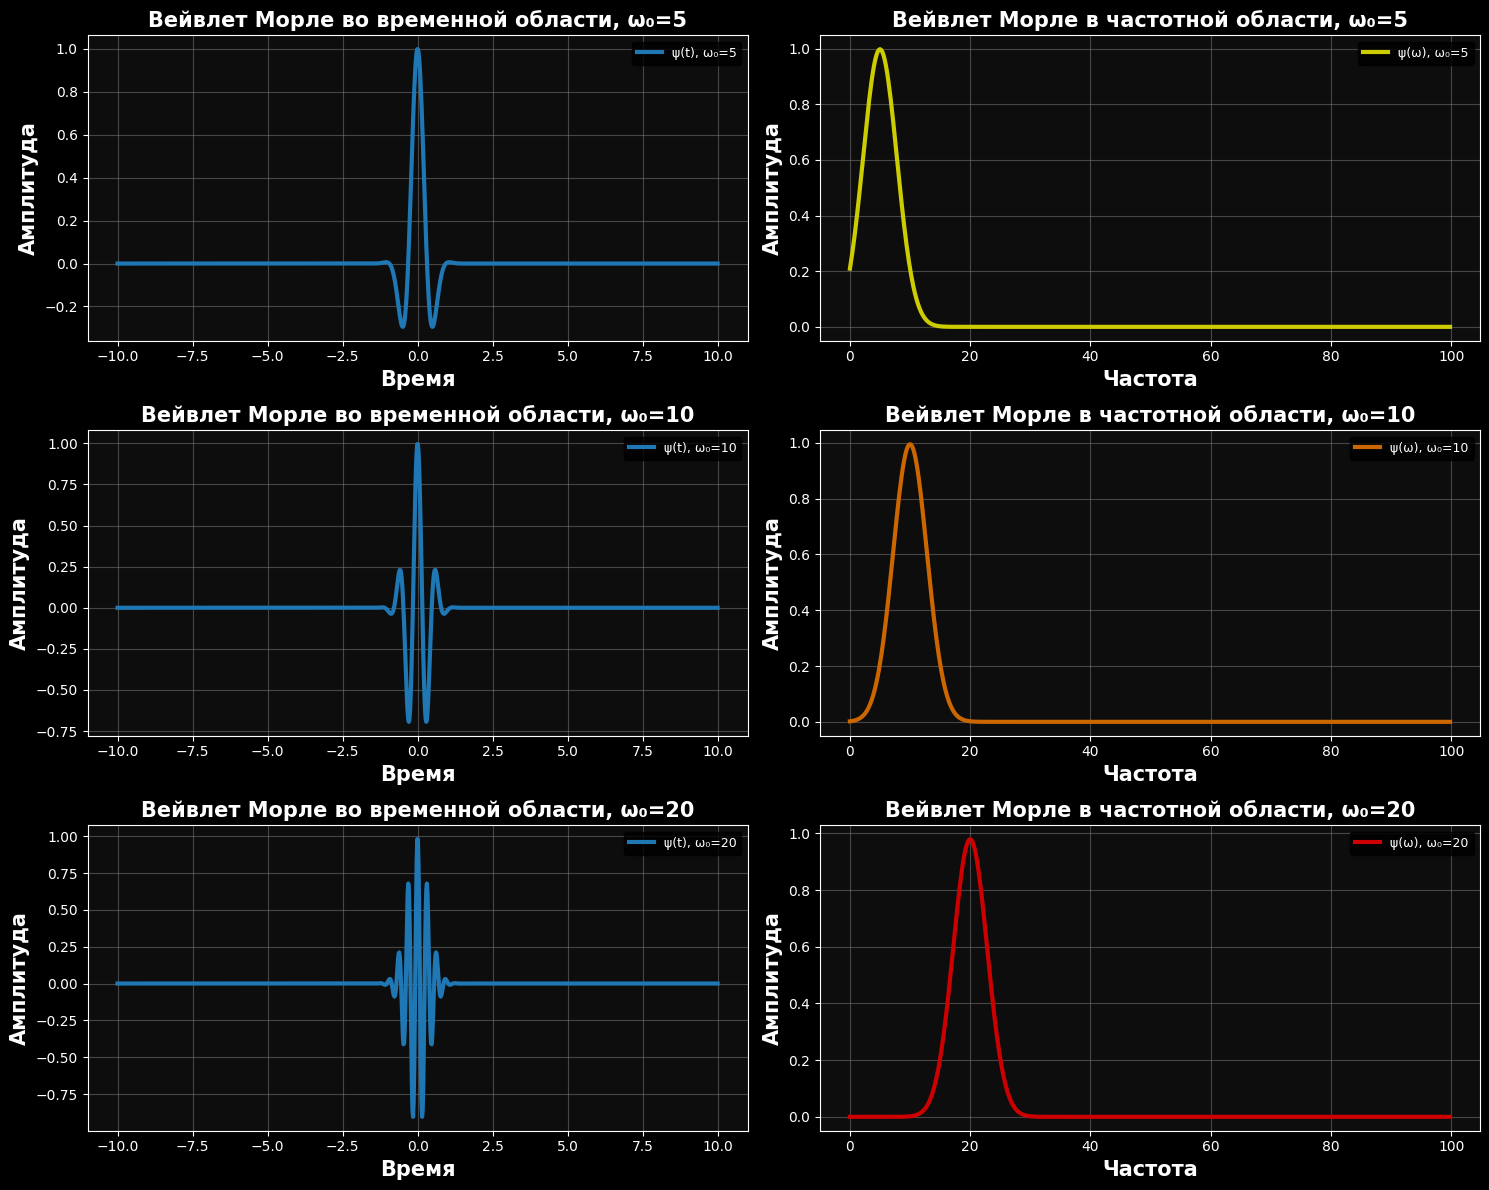

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a_t = -10
b_t = 10
sampling_frequency = 10 * (b_t - a_t)

t = np.linspace(a_t, b_t, 1000)
ω = np.fft.fftfreq(len(t), 1/sampling_frequency)

# Параметры вейвлета Морле
alpha = 0.5                         # Ширина гауссианы
ω0_list = [5, 10, 20]               # Частоты

# Функция для временного пространства вейвлета Морле
def morlet_wavelet_time(t, alpha, ω0):
    return np.exp(-t**2 / alpha**2) * np.exp(1j * ω0 * t)

# Функция для частотного пространства вейвлета Морле
def morlet_wavelet_freq(ω, alpha, ω0):
    psi_w = alpha * np.sqrt(np.pi) * np.exp(-alpha**2 * (ω - ω0)**2 / 4)
    max_psi_t = np.max(np.abs(psi_t))
    psi_w_normalized = psi_w * max_psi_t / np.max(np.abs(psi_w))
    return psi_w_normalized

# Построение графиков
fig, axes = plt.subplots(len(ω0_list), 2, figsize=(15, len(ω0_list) * 4))
red_yellow_colors = grad_colors(len(ω0_list), yellow_color, red_color)

for i, ω0 in enumerate(ω0_list):
    # Вычисление вейвлета
    psi_t = morlet_wavelet_time(t, alpha, ω0).real
    psi_w = morlet_wavelet_freq(ω, alpha, ω0)

    # График во временной области
    axes[i, 0].plot(t, psi_t, label=f'ψ(t), ω₀={ω0}')
    axes[i, 0].set_title(f'Вейвлет Морле во временной области, ω₀={ω0}')
    axes[i, 0].set_xlabel('Время')
    axes[i, 0].set_ylabel('Амплитуда')
    axes[i, 0].legend()

    # График в частотной области
    axes[i, 1].plot(ω[:len(ω)//2], np.abs(psi_w[:len(psi_w)//2]), label=f'ψ(ω), ω₀={ω0}', color=red_yellow_colors[i])
    axes[i, 1].set_title(f'Вейвлет Морле в частотной области, ω₀={ω0}')
    axes[i, 1].set_xlabel('Частота')
    axes[i, 1].set_ylabel('Амплитуда')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


2.

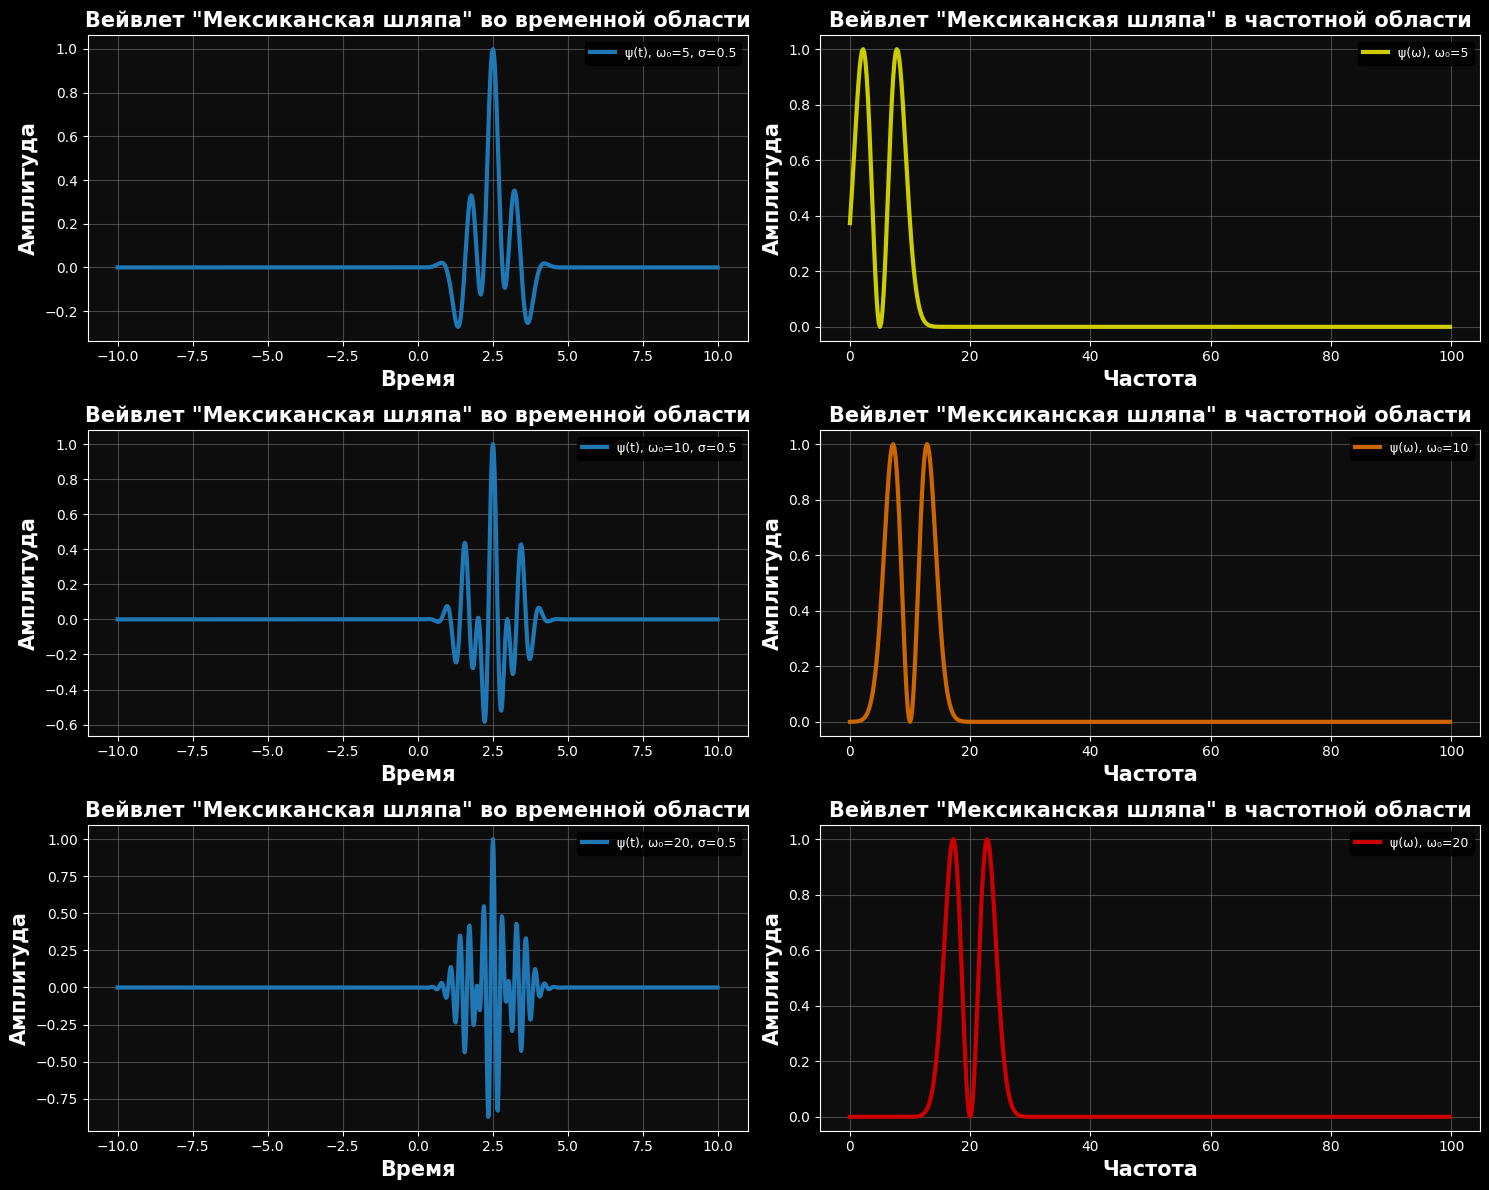

In [35]:
# Параметры вейвлета “Мексиканская шляпа”,
σ = 0.5               # Ширина
t0 = 2.5            # Центр времени
ω0_list = [5, 10, 20]  # Центральные частоты

# Функция для вейвлета "Мексиканская шляпа" во временном пространстве
def mexican_hat_wavelet_time(t, t0, σ, ω0):
    return (1 - ((t - t0)**2) / σ**2) * np.exp(-((t - t0)**2) / (2 * σ**2)) * np.exp(1j * ω0 * t)

# Функция для вейвлета в частотном пространстве
def mexican_hat_wavelet_freq(ω, σ, ω0):
    psi_w = (ω - ω0)**2 * np.exp(-((ω - ω0)**2) * σ**2 / 2)
    max_psi_t = np.max(np.abs(psi_t))
    psi_w_normalized = psi_w * max_psi_t / np.max(np.abs(psi_w))
    return psi_w_normalized


# Построение графиков
fig, axes = plt.subplots(len(ω0_list), 2, figsize=(15, len(ω0_list) * 4))
red_yellow_colors = grad_colors(len(ω0_list), yellow_color, red_color)

for i, ω0 in enumerate(ω0_list):
    
    # Расчет вейвлета во временной области
    psi_t = mexican_hat_wavelet_time(t, t0, σ, ω0)

    # Расчет вейвлета в частотном пространстве
    psi_w = mexican_hat_wavelet_freq(ω, σ, ω0)

    # График во временной области
    axes[i, 0].plot(t, psi_t, label=f'ψ(t), ω₀={ω0}, σ={σ}')
    axes[i, 0].set_title('Вейвлет "Мексиканская шляпа" во временной области')
    axes[i, 0].set_xlabel('Время')
    axes[i, 0].set_ylabel('Амплитуда')
    axes[i, 0].legend()

    # График в частотной области
    axes[i, 1].plot(ω[:len(ω)//2], psi_w[:len(psi_w)//2], label=f'ψ(ω), ω₀={ω0}', color=red_yellow_colors[i])
    axes[i, 1].set_title('Вейвлет "Мексиканская шляпа" в частотной области')
    axes[i, 1].set_xlabel('Частота')
    axes[i, 1].set_ylabel('Амплитуда')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

3.

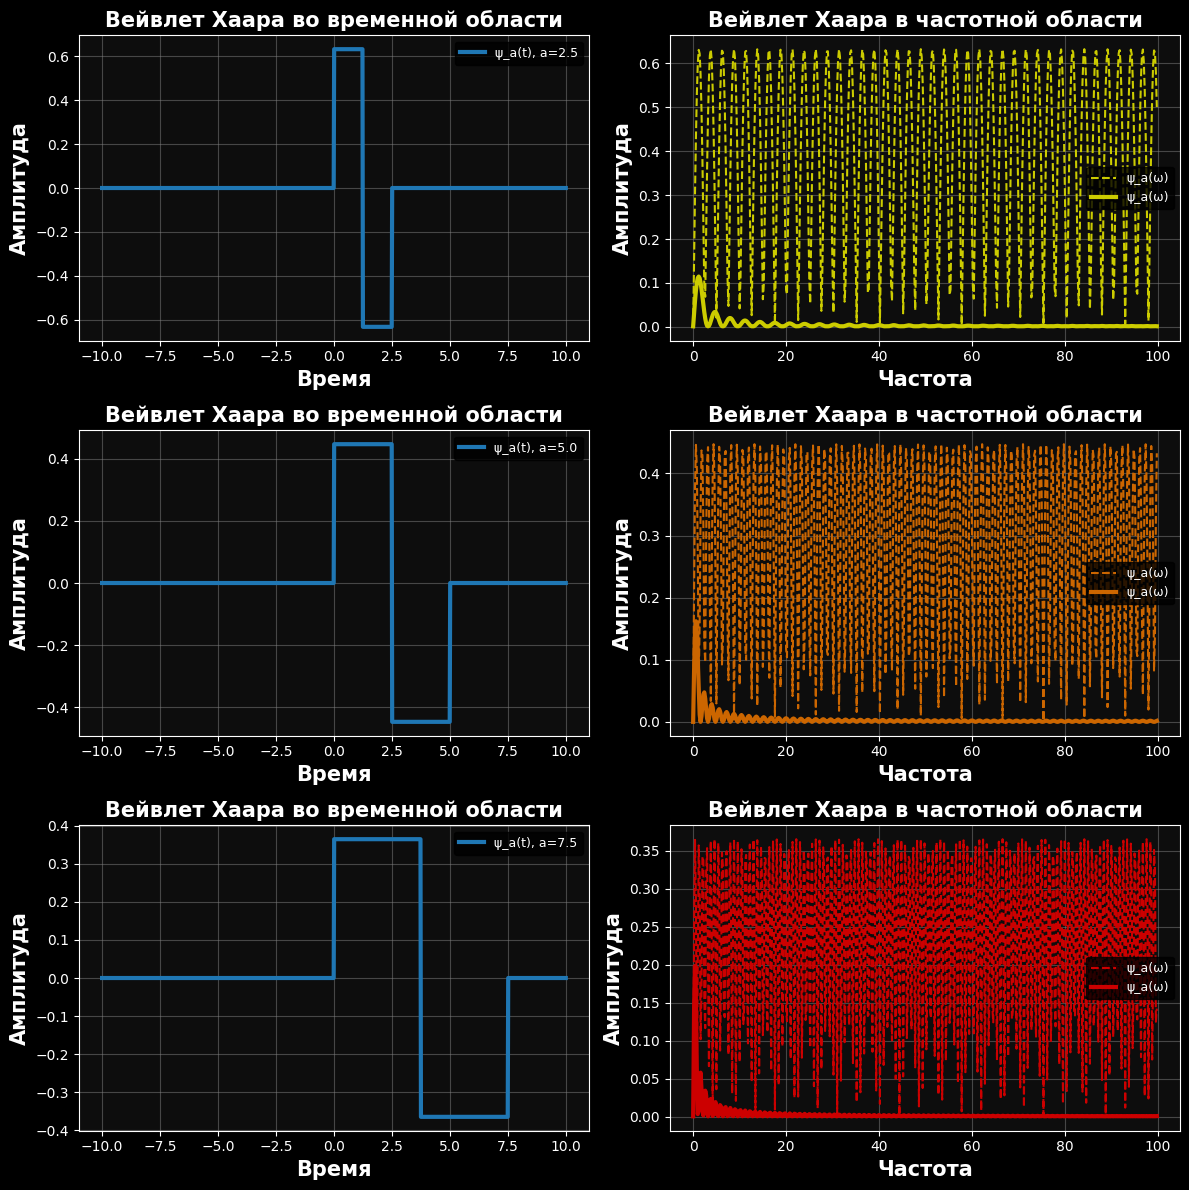

In [36]:
# Параметры вейвлета Хаара
a_list = [2.5, 5.0, 7.5]  # Масштабы


# Функция для вейвлета Хаара во временном пространстве
def haar_wavelet_time(t):
    return np.where((0 <= t) & (t < 0.5), 1, np.where((0.5 <= t) & (t < 1), -1, 0))

# Функция для вейвлета в частотном пространстве
def haar_wavelet_freq(ω):
    return 2j * np.sin(ω / 2) * np.exp(-1j * ω / 2)

# Масштабированный вейвлет
def scaled_wavelet_time(t, a):
    return (1 / np.sqrt(a)) * haar_wavelet_time(t / a)

def scaled_wavelet_freq(ω, a):
    psi_w = np.abs(np.sqrt(a) * haar_wavelet_freq(ω * a))
    max_psi_t = np.max(np.abs(psi_t))
    psi_w_normalized = psi_w * max_psi_t / np.max(np.abs(psi_w))
    return psi_w_normalized

# Построение графиков
fig, axes = plt.subplots(len(a_list), 2, figsize=(12, 4 * len(a_list)))

for i, a in enumerate(a_list):
    # Временной вейвлет
    psi_t = scaled_wavelet_time(t, a)
    psi_w_from_t = np.fft.fft(psi_t)

    # Частотный вейвлет
    psi_w = scaled_wavelet_freq(ω, a)

    # График во временной области
    axes[i, 0].plot(t, psi_t, label=f'ψ_a(t), a={a}')
    axes[i, 0].set_title('Вейвлет Хаара во временной области')
    axes[i, 0].set_xlabel('Время')
    axes[i, 0].set_ylabel('Амплитуда')
    axes[i, 0].legend()

    # График в частотной области
    min_len = min(len(ω), len(psi_w_from_t))
    axes[i, 1].plot(ω[:len(ω)//2], psi_w[:len(psi_w)//2].real, label='ψ_a(ω)', linestyle="--", color=red_yellow_colors[i], linewidth=1.5)
    axes[i, 1].plot(ω[:min_len//2], np.abs(psi_w_from_t[:min_len//2]) * 2 / len(psi_t), label='ψ_a(ω)', color=red_yellow_colors[i])
    axes[i, 1].set_title('Вейвлет Хаара в частотной области')
    axes[i, 1].set_xlabel('Частота')
    axes[i, 1].set_ylabel('Амплитуда')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

4.

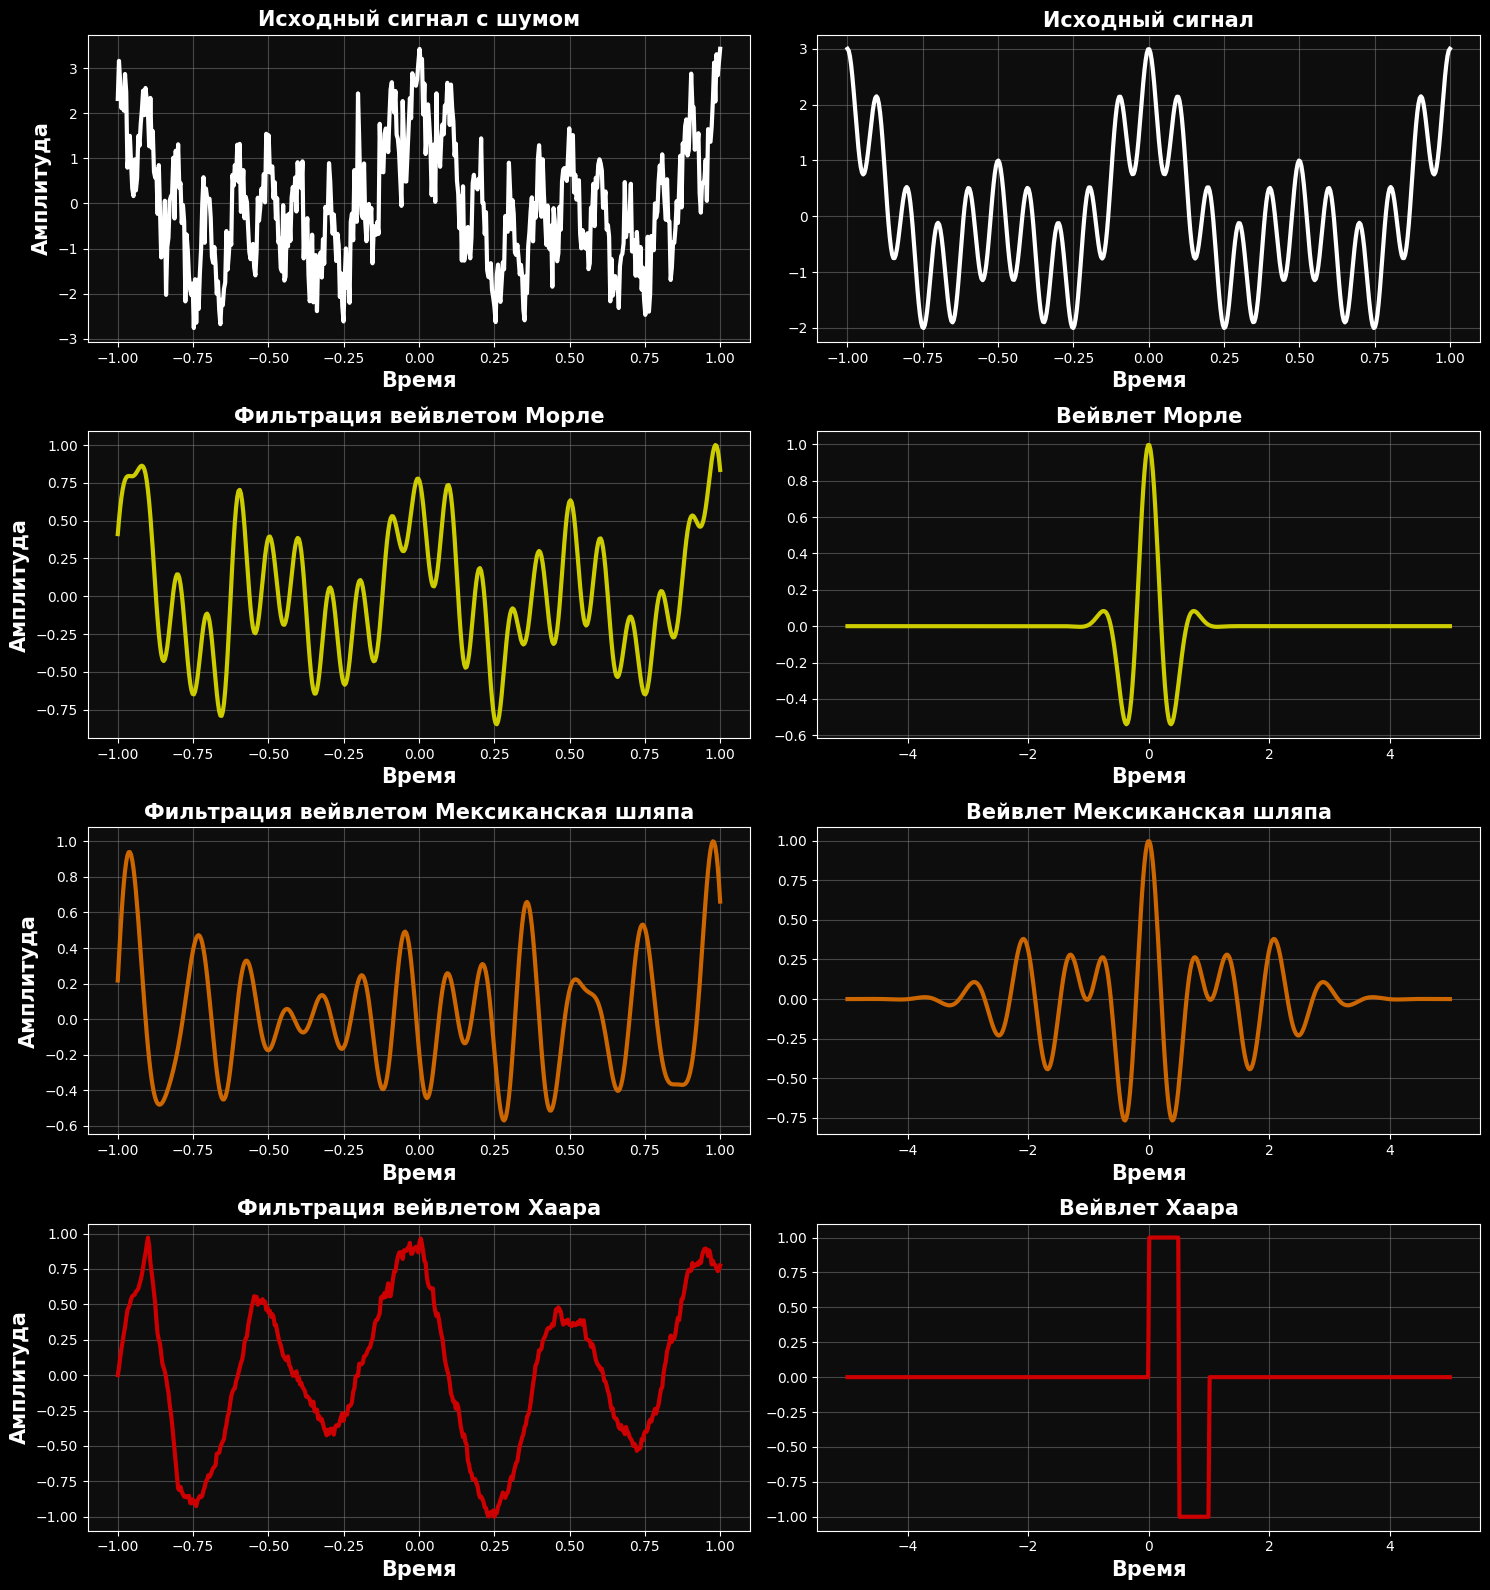

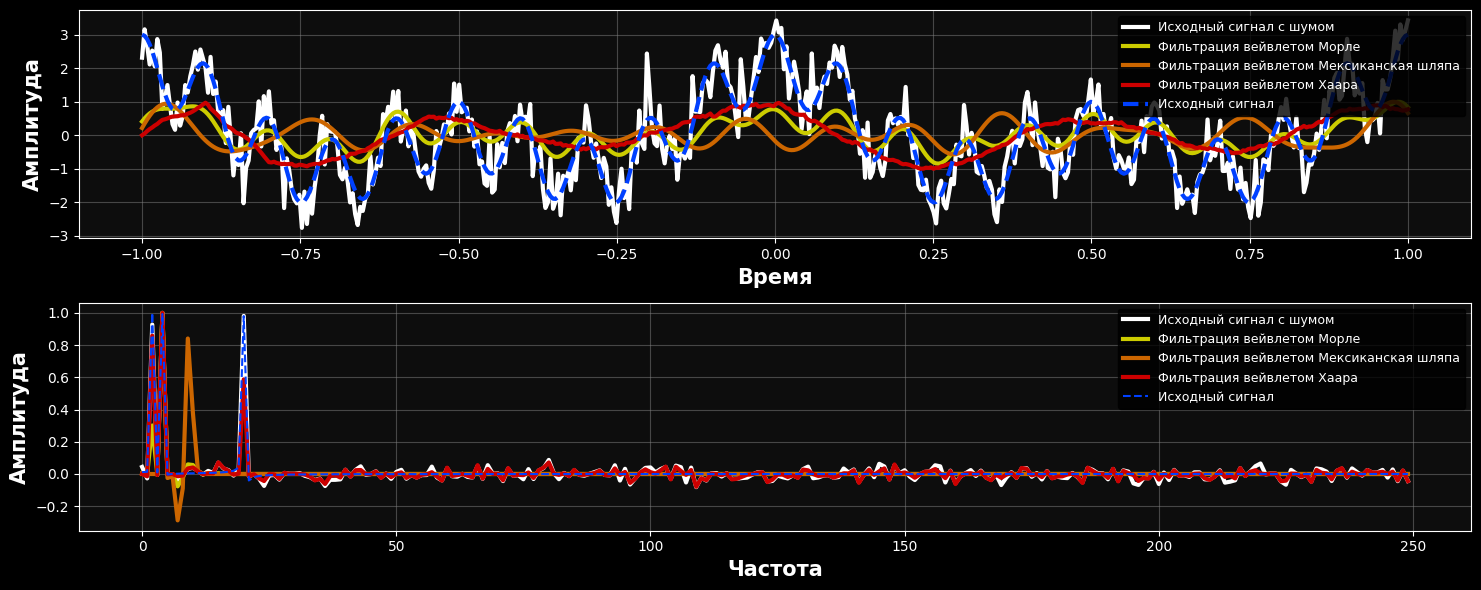

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Параметры сигнала
sin_t = np.linspace(-1, 1, 500)
sin_ω = np.fft.fftfreq(len(sin_t), 1/500)

# Сигнал из суммы двух косинусов
frequency_sin_1 = 1
frequency_sin_2 = 2
frequency_sin_3 = 10
sin_signal = np.cos(2 * np.pi * frequency_sin_1 * sin_t) + np.cos(2 * np.pi * frequency_sin_2 * sin_t) + np.cos(2 * np.pi * frequency_sin_3 * sin_t)
sin_signal_fft = np.fft.fft(sin_signal)
sin_signal_fft /= np.max(np.abs(sin_signal_fft))

# Шум
noise = np.random.normal(0, 0.5, len(sin_t))
noisy_sin_signal = sin_signal + noise
noisy_sin_signal_fft = np.fft.fft(noisy_sin_signal)
noisy_sin_signal_fft /= np.max(np.abs(noisy_sin_signal_fft))

# Параметры вейвлетов
alpha = 0.5         # Ширина гауссианы для Морле
ω0 = 7.5            # Частота для Морле и Мексиканской шляпы
σ = 1.0             # Ширина для Мексиканской шляпы
t0 = 0              # Центр для Мексиканской шляпы
a = 1               # Масштаб для Хаара

wavelets_t = np.linspace(-5, 5, 500)
wavelets_ω = np.fft.fftfreq(len(sin_t), 1/500)

# Применение свертки для каждого вейвлета
morlet_time = morlet_wavelet_time(wavelets_t, alpha, ω0).real
mexican_hat_time = mexican_hat_wavelet_time(wavelets_t, t0, σ, ω0).real
haar_time = scaled_wavelet_time(wavelets_t, a)

morlet_freq = morlet_wavelet_freq(wavelets_ω, alpha, ω0).real
mexican_hat_freq = mexican_hat_wavelet_freq(wavelets_ω, σ, ω0).real
haar_freq = scaled_wavelet_freq(wavelets_ω, a)

# Применение свертки для каждого вейвлета и нормализация
filtered_morlet = convolve(noisy_sin_signal, morlet_time, mode='same')
filtered_mexican_hat = convolve(noisy_sin_signal, mexican_hat_time, mode='same')
filtered_haar = convolve(noisy_sin_signal, haar_time, mode='same')

filtered_morlet /= np.max(np.abs(filtered_morlet))
filtered_mexican_hat /= np.max(np.abs(filtered_mexican_hat))
filtered_haar /= np.max(np.abs(filtered_haar))

filtered_morlet_fft = noisy_sin_signal_fft * np.abs(morlet_freq)
filtered_mexican_hat_fft = noisy_sin_signal_fft * np.abs(mexican_hat_freq)
filtered_haar_fft = noisy_sin_signal_fft * np.abs(haar_freq)

filtered_morlet_fft /= np.max(np.abs(filtered_morlet_fft))
filtered_mexican_hat_fft /= np.max(np.abs(filtered_mexican_hat_fft))
filtered_haar_fft /= np.max(np.abs(filtered_haar_fft))

signals = [noisy_sin_signal, filtered_morlet, filtered_mexican_hat, filtered_haar]
wavelets = [sin_signal, morlet_time, mexican_hat_time, haar_time]
wavelets_fft = [noisy_sin_signal_fft, filtered_morlet_fft, filtered_mexican_hat_fft, filtered_haar_fft]

texts = [('Исходный сигнал с шумом', 'Исходный сигнал'), 
          ('Фильтрация вейвлетом Морле', 'Вейвлет Морле'), 
          ('Фильтрация вейвлетом Мексиканская шляпа', 'Вейвлет Мексиканская шляпа'), 
          ('Фильтрация вейвлетом Хаара', 'Вейвлет Хаара')]

# Графики
white_red_yellow_colors = [np.array(font_color)] + red_yellow_colors.copy()

fig, axes = plt.subplots(len(signals), 2, figsize=(15, len(signals)*4))

for i, signal in enumerate(signals):
  axes[i, 0].plot(sin_t, signal, color=white_red_yellow_colors[i])
  axes[i, 0].set_title(f'{texts[i][0]}')
  axes[i, 0].set_xlabel('Время')
  axes[i, 0].set_ylabel('Амплитуда')

  if i == 0:
    axes[i, 1].plot(sin_t, wavelets[i], color=white_red_yellow_colors[i])
  else:
    axes[i, 1].plot(wavelets_t, wavelets[i], color=white_red_yellow_colors[i])
  axes[i, 1].set_title(f'{texts[i][1]}')
  axes[i, 1].set_xlabel('Время')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 1, figsize=(15, 6))

for i, signal in enumerate(signals):
  axes[0].plot(sin_t, signal, color=white_red_yellow_colors[i], label=f'{texts[i][0]}')

axes[0].plot(sin_t, sin_signal, color=blue_color, linestyle="--", label=f'{texts[0][1]}')
axes[0].set_xlabel('Время')
axes[0].set_ylabel('Амплитуда')
axes[0].legend(loc="upper right")

for i, wavelet_fft in enumerate(wavelets_fft):
  axes[1].plot(sin_ω[:len(sin_ω)//2], wavelet_fft[:len(wavelet_fft)//2].real, color=white_red_yellow_colors[i], label=f'{texts[i][0]}')
  
axes[1].plot(sin_ω[:len(sin_ω)//2], sin_signal_fft[:len(sin_signal_fft)//2].real, color=blue_color, linestyle="--", 
             linewidth=1.5, label=f'{texts[0][1]}')
axes[1].set_xlabel('Частота')
axes[1].set_ylabel('Амплитуда')
axes[1].legend(loc="upper right")

plt.tight_layout()
plt.show()


5.

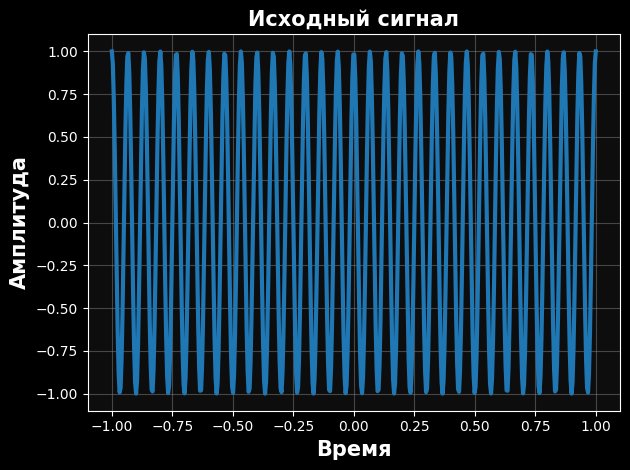

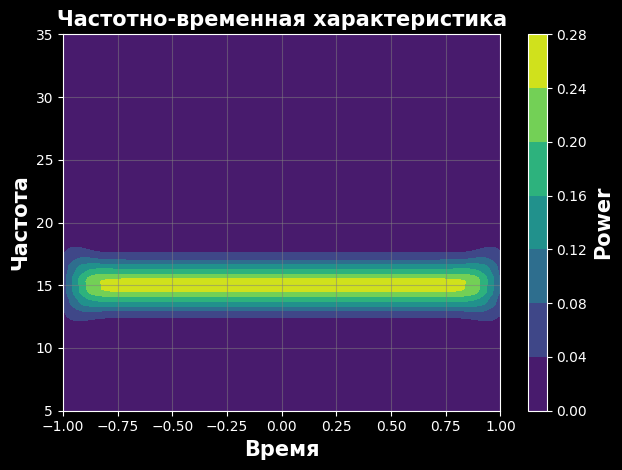

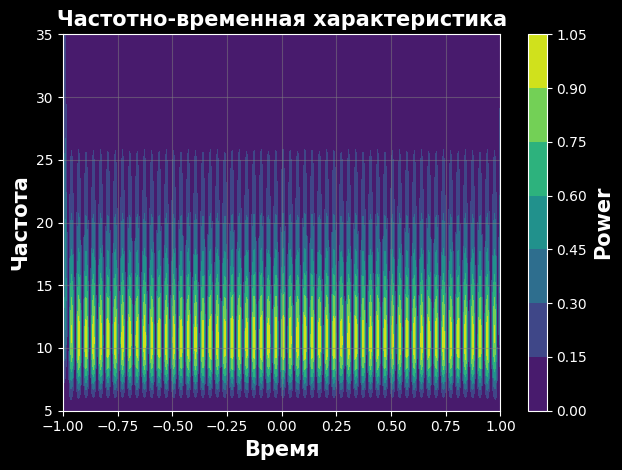

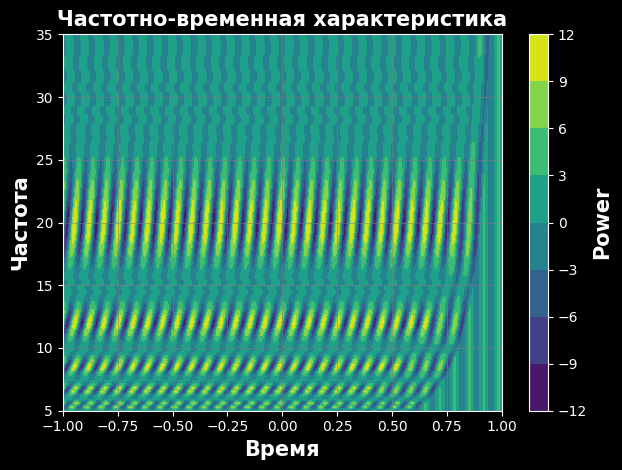

In [63]:
import scipy.fftpack

# Генерация сигнала
def get_sin_with_time(sampling_frequency=1000, frequency_start=0.05, frequency_center=20, amplitude=1.0, a=-2, b=2, noise=None):
    srate = sampling_frequency
    t = np.arange(a, b, 1 / srate)
    ln = len(t)
    
    # Плавный переход частоты от frequency_start к frequency_center и обратно
    center = ln // 2
    freqmod = frequency_start + (frequency_center - frequency_start) * np.exp(-((t - t[center])**2))
    
    signal = amplitude * np.sin(2 * np.pi * (t + np.cumsum(freqmod) / srate))
    return t, signal

# Морле вейвлет
def morlet_wavelet(t, freq, fwhm):
    gauss = np.exp(-(4 * np.log(2) * t**2) / fwhm**2)
    wavelet = np.exp(1j * 2 * np.pi * freq * t) * gauss
    return wavelet

# "Мексиканская шляпа" вейвлет
def mexican_hat_wavelet(t, freq):
    sigma = 1 / (2 * np.pi * freq)
    norm_factor = 2 / (np.sqrt(4 * sigma) * (np.pi**25))
    wavelet = norm_factor * (1 - (t / sigma)**2) * np.exp(- (t**2) / (2 * sigma**2))
    return wavelet

# Вейвлет Хаара
def haar_wavelet(t, freq):
    wavelet = np.zeros_like(t, dtype=complex)
    for i, x in enumerate(t):
        if 0 <= x < 0.5 / freq:
            wavelet[i] = 1
        elif 0.5 / freq <= x < 1 / freq:
            wavelet[i] = -1
    return wavelet

# Спектрограмма
def spectrogram(start, end, signal, time, wavelet_type=None):
    frequency_1 = 100
    frequency_2 = np.linspace(start, end, frequency_1)
    fwhm = 0.2
    pnts = len(time)
    Ws = np.zeros((frequency_1, len(time)), dtype=complex)
    
    for wi in range(frequency_1):
        freq = frequency_2[wi]
        if wavelet_type == 'morle':
            Ws[wi, :] = morlet_wavelet(time, freq, fwhm)
        elif wavelet_type == 'mexh':
            Ws[wi, :] = mexican_hat_wavelet(time, freq)
        elif wavelet_type == 'haar':
            Ws[wi, :] = haar_wavelet(time, freq)
    
    conv = pnts * 2 - 1
    half = int(np.floor(pnts / 2) + 1)
    signal_fft = scipy.fftpack.fft(signal, conv)
    tf = np.zeros((frequency_1, len(time)))
    
    for fi in range(frequency_1):
        if wavelet_type == 'haar':
            for i, t in enumerate(time):
                tf[fi, i] = np.sum(signal[i: i + int(500 / frequency_2[fi])]) 
                tf[fi, i] -= np.sum(signal[i + int(500 / frequency_2[fi]): i + int(1000 / frequency_2[fi])])
        else:
            wave_fft = scipy.fftpack.fft(Ws[fi, :], conv)
            wave_fft /= np.max(wave_fft)
            conv_res = scipy.fftpack.ifft(wave_fft * signal_fft)
            conv_res = conv_res[half - 3: -half]
            tf[fi, :] = np.abs(conv_res)**2

    plt.contourf(time, frequency_2, tf)
    plt.colorbar(label="Power")
    plt.xlabel('Время')
    plt.ylabel('Частота')
    plt.title('Частотно-временная характеристика')
    plt.tight_layout()
    plt.show()

# Тестовый запуск
frequency_start = 5
frequency_center = 15
t, signal = get_sin_with_time(sampling_frequency=1000, frequency_start=frequency_start, frequency_center=frequency_center, amplitude=2.0, a=-2, b=2)
t = np.linspace(-1, 1, 500)
signal = np.cos(2 * np.pi * frequency_center * t)
plt.plot(t, signal)
plt.xlabel('Время')
# plt.xlim(-1, 1)
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.tight_layout()
plt.show()

# Построение спектрограммы
spectrogram(5, 35, signal, t, wavelet_type='morle')
spectrogram(5, 35, signal, t, wavelet_type='mexh')
spectrogram(5, 35, signal, t, wavelet_type='haar')


6.

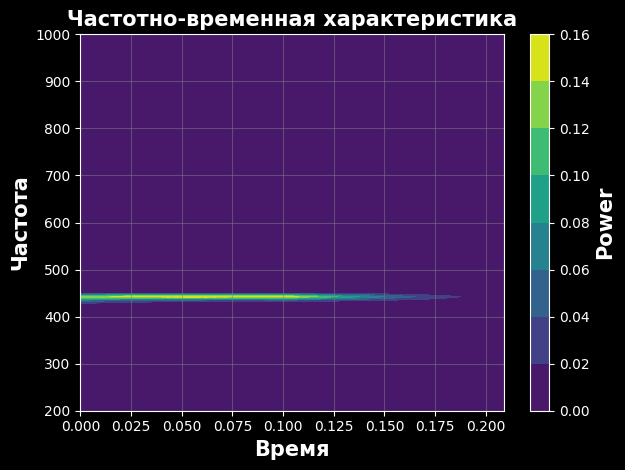

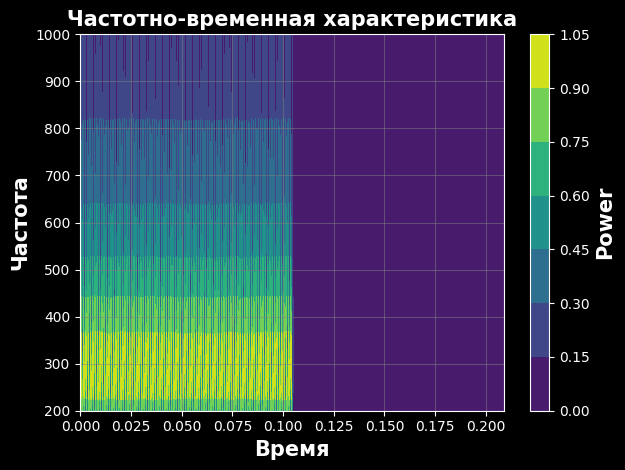

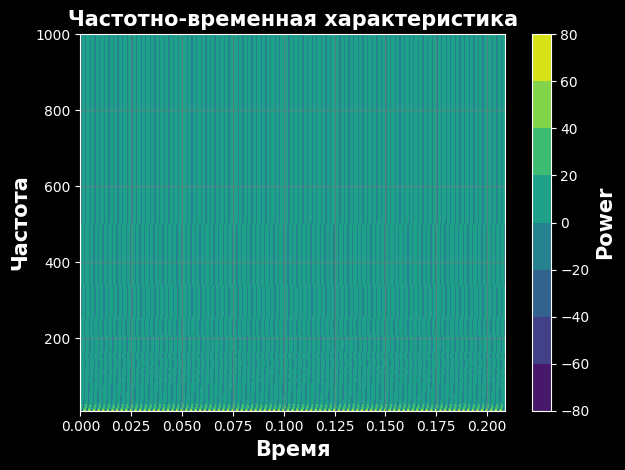

In [58]:
import scipy.io.wavfile as wavfile

rate, signal = wavfile.read('la_note.wav')

if signal.ndim > 1:
    signal = signal.mean(axis=1)
signal = signal / np.max(np.abs(signal))
time = np.arange(len(signal)) / rate
start_freq = 200
end_freq = 600

spectrogram(200, 1000, signal, time, wavelet_type='morle')
spectrogram(200, 1000, signal, time, wavelet_type='mexh')
spectrogram(10, 1000, signal, time, wavelet_type='haar')